In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
import graphviz
from graphviz import Source
 
from sklearn.model_selection import train_test_split

from sklearn.tree import export_graphviz
import sklearn.metrics as met
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
rushing = pd.read_csv("2018_NFL_Rushing_Stats.csv")
rushing = rushing.drop(columns=['Rk', 'Player'])
rushing.head()

,Tm,Age,Pos,G,GS,Att,Yds,TD,Lng,Y/A,Y/G,Fmb
0,DAL,23,RB,15,15,304,1434,6,41,4.7,95.6,6
1,NYG,21,RB,16,16,261,1307,11,78,5.0,81.7,0
2,ARI,27,RB,16,16,258,940,7,53,3.6,58.8,3
3,LAR,24,RB,14,14,256,1251,17,36,4.9,89.4,1
4,WAS,33,RB,16,16,251,1042,7,90,4.2,65.1,3


In [3]:
rushing = pd.get_dummies(rushing, columns = ["Tm", "Pos"], drop_first = True)
rushing.head()

,Age,G,GS,Att,Yds,TD,Lng,Y/A,Y/G,Fmb,...,Pos_QB,Pos_QB/WR,Pos_RB,Pos_RB/TE,Pos_RB/WR,Pos_S,Pos_TE,Pos_TE/WR,Pos_WR,Pos_WR/RB
0,23,15,15,304,1434,6,41,4.7,95.6,6,...,0,0,1,0,0,0,0,0,0,0
1,21,16,16,261,1307,11,78,5.0,81.7,0,...,0,0,1,0,0,0,0,0,0,0
2,27,16,16,258,940,7,53,3.6,58.8,3,...,0,0,1,0,0,0,0,0,0,0
3,24,14,14,256,1251,17,36,4.9,89.4,1,...,0,0,1,0,0,0,0,0,0,0
4,33,16,16,251,1042,7,90,4.2,65.1,3,...,0,0,1,0,0,0,0,0,0,0


In [4]:
X = rushing.drop(columns = "Yds")
X.head()

,Age,G,GS,Att,TD,Lng,Y/A,Y/G,Fmb,Tm_ARI,...,Pos_QB,Pos_QB/WR,Pos_RB,Pos_RB/TE,Pos_RB/WR,Pos_S,Pos_TE,Pos_TE/WR,Pos_WR,Pos_WR/RB
0,23,15,15,304,6,41,4.7,95.6,6,0,...,0,0,1,0,0,0,0,0,0,0
1,21,16,16,261,11,78,5.0,81.7,0,0,...,0,0,1,0,0,0,0,0,0,0
2,27,16,16,258,7,53,3.6,58.8,3,1,...,0,0,1,0,0,0,0,0,0,0
3,24,14,14,256,17,36,4.9,89.4,1,0,...,0,0,1,0,0,0,0,0,0,0
4,33,16,16,251,7,90,4.2,65.1,3,0,...,0,0,1,0,0,0,0,0,0,0


In [5]:
y = rushing["Yds"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [7]:
reg = tree.DecisionTreeRegressor(max_depth = 3)
reg = reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [8]:
((y_pred - y_test)**2).mean()

1538.686363924207

[Text(167.4, 190.26, 'X[3] <= 96.5\nentropy = 86852.676\nsamples = 272\nvalue = 185.136'),
 Text(83.7, 135.9, 'X[3] <= 33.5\nentropy = 11643.822\nsamples = 230\nvalue = 74.852'),
 Text(41.85, 81.53999999999999, 'X[7] <= 4.05\nentropy = 1527.152\nsamples = 184\nvalue = 29.505'),
 Text(20.925, 27.180000000000007, 'entropy = 229.023\nsamples = 128\nvalue = 11.234'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 1987.16\nsamples = 56\nvalue = 71.268'),
 Text(125.55000000000001, 81.53999999999999, 'X[3] <= 57.5\nentropy = 10983.965\nsamples = 46\nvalue = 256.239'),
 Text(104.625, 27.180000000000007, 'entropy = 2664.741\nsamples = 27\nvalue = 189.0'),
 Text(146.475, 27.180000000000007, 'entropy = 7251.429\nsamples = 19\nvalue = 351.789'),
 Text(251.10000000000002, 135.9, 'X[3] <= 173.5\nentropy = 67368.4\nsamples = 42\nvalue = 789.071'),
 Text(209.25, 81.53999999999999, 'X[7] <= 42.25\nentropy = 14519.505\nsamples = 23\nvalue = 590.13'),
 Text(188.32500000000002, 27.18000000000000

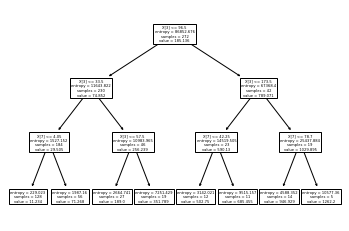

In [9]:
tree.plot_tree(reg)

In [10]:
dot_data = tree.export_graphviz(reg, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Yds_DTR.dot")

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'Yds_DTR.dot'], make sure the Graphviz executables are on your systems' PATH

In [11]:
with open ("Yds_DTR.dot", "r") as fin:
    with open("Yds_DTR_fixed.dot","w") as fout:
        for line in fin.readlines():
            line = line.replace("X[0]","Age")
            line = line.replace("X[1]","G")
            line = line.replace("X[2]","GS")
            line = line.replace("X[3]","Att")
            line = line.replace("X[4]","TD")
            line = line.replace("X[5]","Lng")            
            line = line.replace("X[6]","Y/A")
            line = line.replace("X[7]","Y/G")
            line = line.replace("X[8]","Fmb")
            fout.write(line)

In [12]:
mses = []
for d in range(2,8):
    reg = tree.DecisionTreeRegressor(max_depth = d)
    reg = reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    mse = ((y_test - y_pred)**2).mean()
    mses.append(mse)

Text(0, 0.5, 'Mean Squared Error')

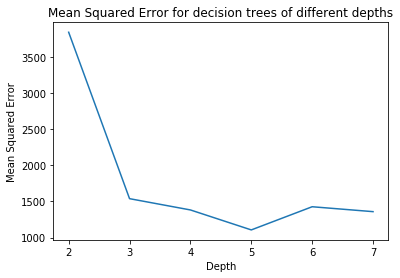

In [13]:
plt.plot(range(2,8),mses)
plt.title("Mean Squared Error for decision trees of different depths")
plt.xlabel("Depth")
plt.ylabel("Mean Squared Error")

Text(0, 0.5, 'Predicted Yards')

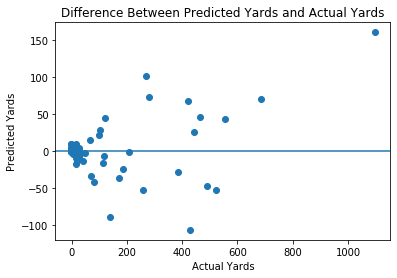

In [14]:
# sns.relplot(x= y_test, y= y_pred, data=rushing)
plt.scatter( x = y_test, y = y_test - y_pred)
plt.axhline()
plt.title("Difference Between Predicted Yards and Actual Yards")
plt.xlabel("Actual Yards")
plt.ylabel("Predicted Yards")